In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Let's use a table of nodes and a table of edges of relationships between
# Harry Potter characters from Efe Karakus:
# https://github.com/efekarakus/potter-network

In [3]:
characters = pd.read_csv("potter-network/data/characters.csv")


In [4]:
characters.head()

,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...


In [5]:
relations=pd.read_csv("potter-network/data/relations.csv")

In [6]:
relations.head()

,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+


In [7]:
import networkx as nx

In [8]:
G = nx.from_pandas_edgelist(relations, source="source", target="target")

In [9]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

In [10]:
dir(nx) # very long, networkx does a lot of things

['AmbiguousSolution',
 'ArborescenceIterator',
 'DiGraph',
 'EdgePartition',
 'ExceededMaxIterations',
 'Graph',
 'GraphMLReader',
 'GraphMLWriter',
 'HasACycle',
 'LCF_graph',
 'LFR_benchmark_graph',
 'MultiDiGraph',
 'MultiGraph',
 'NetworkXAlgorithmError',
 'NetworkXError',
 'NetworkXException',
 'NetworkXNoCycle',
 'NetworkXNoPath',
 'NetworkXNotImplemented',
 'NetworkXPointlessConcept',
 'NetworkXTreewidthBoundExceeded',
 'NetworkXUnbounded',
 'NetworkXUnfeasible',
 'NodeNotFound',
 'NotATree',
 'OrderedDiGraph',
 'OrderedGraph',
 'OrderedMultiDiGraph',
 'OrderedMultiGraph',
 'PlanarEmbedding',
 'PowerIterationFailedConvergence',
 'SpanningTreeIterator',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'adamic_adar_index',
 'add_cycle',
 'add_path',
 'add_star',
 'adj_matrix',
 'adjacency',
 'adjacency_data',
 'adjacency_graph',
 'adjacency_matrix',
 'adjacency_spectrum',

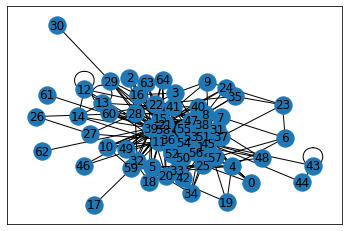

In [11]:
# networkx has some basic graphing and layout functions, 
nx.draw_networkx(G)

In [ ]:
# But having integer labels for nodes is a visualization-killing flaw.  
# How to put labels on the nodes? 

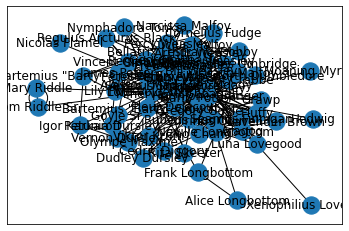

In [12]:
# as a parameter to networkx works, but this is not a long-term solution;
# the networkx graph needs to be invested with the edge geometry and the 
# node names if anything fancy is going to work.
nx.draw_networkx(G, labels=characters.name)

In [13]:
# I can create a dictionary with the mapping from ID to name:
chardict = { x["id"] : x["name"] for i,x in characters.iterrows()}

In [14]:
chardict

{0: 'Regulus Arcturus Black',
 1: 'Sirius Black',
 2: 'Lavender Brown',
 3: 'Cho Chang',
 4: 'Vincent Crabbe Sr.',
 5: 'Vincent Crabbe',
 6: 'Bartemius "Barty" Crouch Sr.',
 7: 'Bartemius "Barty" Crouch Jr.',
 8: 'Fleur Delacour',
 9: 'Cedric Diggory',
 10: 'Alberforth Dumbledore',
 11: 'Albus Dumbledore',
 12: 'Dudley Dursley',
 13: 'Petunia Dursley',
 14: 'Vernon Dursley',
 15: 'Argus Filch',
 16: 'Seamus Finnigan',
 17: 'Nicolas Flamel',
 18: 'Cornelius Fudge',
 19: 'Goyle Sr.',
 20: 'Gregory Goyle',
 21: 'Hermione Granger',
 22: 'Rubeus Hagrid',
 23: 'Igor Karkaroff',
 24: 'Viktor Krum',
 25: 'Bellatrix Lestrange',
 26: 'Alice Longbottom',
 27: 'Frank Longbottom',
 28: 'Neville Longbottom',
 29: 'Luna Lovegood',
 30: 'Xenophilius Lovegood',
 31: 'Remus Lupin',
 32: 'Draco Malfoy',
 33: 'Lucius Malfoy',
 34: 'Narcissa Malfoy',
 35: 'Olympe Maxime',
 36: 'Minerva McGonagall',
 37: 'Alastor "Mad-Eye" Moody',
 38: 'Peter Pettigrew',
 39: 'Harry Potter',
 40: 'James Potter',
 41: 'Lily 

In [15]:
nx.relabel.relabel_nodes(G,chardict, copy=False)

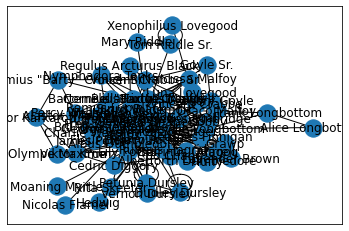

In [16]:
nx.draw_networkx(G)

In [ ]:
# Now the nodes carry human-readable labels.  

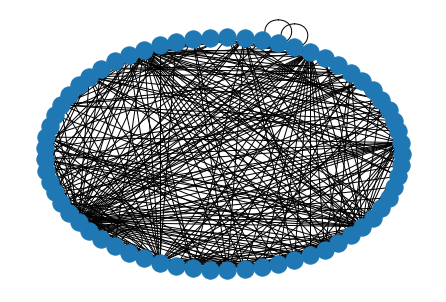

In [17]:
# And some other layout options are available:
nx.draw_circular(G)

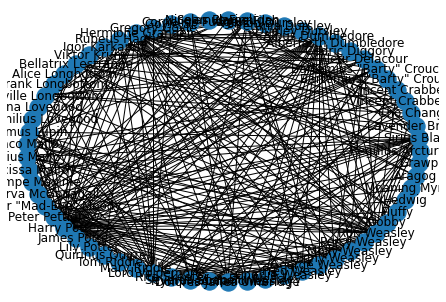

In [17]:
# Not all layout options show the labels by default...
nx.draw_circular(G, with_labels=True)

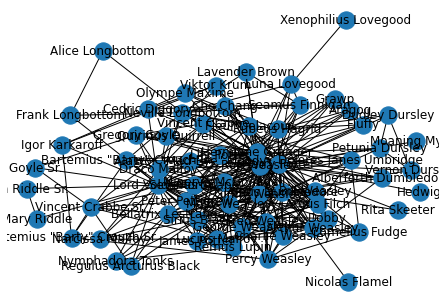

In [18]:
nx.draw_kamada_kawai(G, with_labels=True)

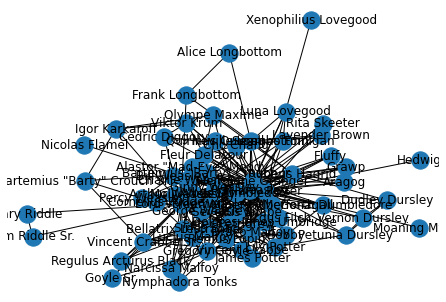

In [19]:
nx.draw_spring(G, with_labels=True)

In [19]:
# These are some bare-bones visualizations, yes.  
# pyvis is a package which, like altair, packages network data and
# hands it off to a renderer in javascript.  It claims more functionality
# for visualization than networkx, but uses networkx data structures.

from pyvis.network import Network

In [20]:
net = Network(notebook=True)

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


In [21]:
net.from_nx(G)

In [22]:
net.show("potternetwork.html")

In [23]:

net.show_buttons(filter_=['physics'])
net.show("potternetwork.html")


In [ ]:
# While I can play with this a little in the notebook, this really needs its own window.


In [24]:
net.show_buttons(filter_=['physics'])
net.show("potternetwork.html")

In [ ]:
# Next, I would like to color the nodes according to an attribute.
# I can do this either by creating a list of colors and using it at rendering time,
# or by baking the colors into the network data structure.  

# https://stackoverflow.com/questions/62202944/networkx-pyvis-change-color-of-nodes
# Let us add the colors with an if statement at the time of node creation; we can 
# do what nx.from_pandas_edgelist did and more.

In [ ]:
# G = nx.from_pandas_edgelist(relations, source="source", target="target")

In [25]:
GCOLOR = nx.Graph()

In [26]:
relations.head()

,source,target,type
0,0,1,-
1,0,25,-
2,0,45,-
3,1,0,-
4,1,11,+


In [27]:
# Loop through the relationships..
for i, row in relations.iterrows():
    source, target, typ = row
    print(source, target)

#GCOLOR.add_node(source="source", target="target")

0 1
0 25
0 45
1 0
1 11
1 21
1 25
1 31
1 33
1 34
1 36
1 37
1 38
1 39
1 40
1 41
1 45
1 47
1 48
1 50
1 53
1 54
1 55
1 58
2 21
2 28
2 58
3 9
3 16
3 21
3 28
3 39
3 45
3 58
4 0
4 5
4 6
4 25
4 33
4 38
4 45
4 47
5 4
5 49
5 20
5 21
5 32
5 39
5 58
6 4
6 7
6 23
6 57
7 6
7 21
7 28
7 36
7 37
7 39
7 45
7 47
7 38
8 21
8 25
8 28
8 37
8 39
8 51
8 55
8 56
8 58
9 3
9 39
9 45
10 11
10 21
10 39
10 58
10 59
11 1
11 10
11 13
11 14
11 21
11 22
11 25
11 31
11 36
11 36
11 37
11 38
11 39
11 40
11 41
11 42
11 45
11 46
11 47
11 49
11 49
11 50
11 51
11 52
11 53
11 54
11 55
11 56
11 57
11 58
12 12
12 14
12 39
12 22
13 11
13 12
13 13
13 39
13 41
14 11
14 12
14 13
14 39
15 1
15 11
15 22
15 36
15 38
15 39
15 40
15 47
15 49
15 53
15 54
16 2
16 3
16 21
16 28
16 29
16 39
16 55
16 58
17 11
18 11
18 33
18 39
18 49
18 50
18 57
19 4
19 20
19 45
20 19
20 5
20 32
20 39
20 45
21 39
21 58
21 54
21 56
21 47
21 29
21 28
21 45
21 38
21 32
21 15
21 20
22 45
22 60
22 63
22 64
22 58
22 21
22 47
22 39
22 28
22 35
22 36
22 11
23 45
23 24

In [29]:
GCOLOR=nx.Graph()
# Loop through the relationships..
for i, row in relations.iterrows():
    source, target, typ = row
    GCOLOR.add_edge(source, target)
    

In [30]:
characters.head()

,id,name,bio
0,0,Regulus Arcturus Black,Brother of Sirius. Used to be a Death Eater bu...
1,1,Sirius Black,Best friend of James Potter and godfather of H...
2,2,Lavender Brown,Killed by a werewolf. She was a gryffindor stu...
3,3,Cho Chang,Ravenclaw student who dated Cedric Diggory and...
4,4,Vincent Crabbe Sr.,Father of Crabbe and death-eater who escaped A...


In [28]:
for i, row in characters.iterrows():
    nodeid, name, bio = row
    GCOLOR.add_node(nodeid, title=name, label=name)

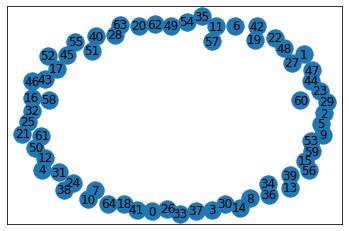

In [29]:
nx.draw_networkx(GCOLOR)

In [30]:
nx.relabel.relabel_nodes(GCOLOR,chardict, copy=False)

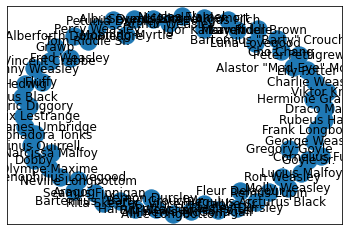

In [31]:
nx.draw_networkx(GCOLOR)

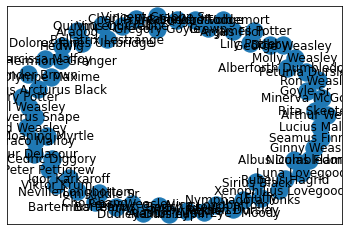

In [32]:
nx.draw_networkx(GCOLOR)

In [33]:
roles = pd.read_csv("potter-network/data/roles.csv", sep="\t")

In [34]:
roles.head()

,id,name,role
0,0,Regulus Arcturus Black,NaN
1,1,Sirius Black,NaN
2,2,Lavender Brown,student
3,3,Cho Chang,student
4,4,Vincent Crabbe Sr.,NaN


In [35]:
colorlist = []
for i, row in roles.iterrows():
    nodeid, name, role= row
    if role == "student":
        colorlist.append("blue")
    elif role == "faculty":
        colorlist.append("red")
    else:
        colorlist.append("black")

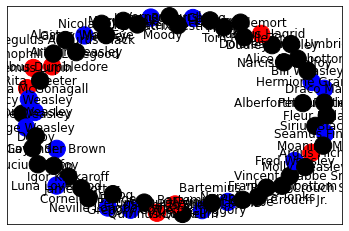

In [36]:
nx.draw_networkx(GCOLOR, node_color=colorlist)

In [37]:

GCOLOR=nx.Graph()
# First, add edges
for i, row in relations.iterrows():
    source, target, typ = row
    GCOLOR.add_edge(source, target)
# next, add node groups (student, faculty, other)
for i, row in roles.iterrows():
    nodeid, name, role= row
    if role == "student":
        GCOLOR.add_node(nodeid, title=name, group=1)
    elif role == "faculty":
        GCOLOR.add_node(nodeid, title=name, group=2)
    else:
        GCOLOR.add_node(nodeid, title=name, group=3)
# finally, add node labels (names)
nx.relabel.relabel_nodes(GCOLOR,chardict, copy=False)

In [38]:
nt = Network(notebook=True)
nt.from_nx(GCOLOR)
nt.show("another.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
